<a href="https://colab.research.google.com/github/paolaim/mineria-datos/blob/gh-pages/AvancePIA_II_003_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Equipo: 7*

## Grupo: 003 - Lunes 6:00 pm - 9:00 pm

## Integrantes:

- 1744128, Blanco Gonzalez, Reyna Yarelli
- 1723446, Garza Alvarez, Aaron Emmanuel
- 1731502, Ibarra Medrano, Paola
- 1799361, Lucas Belmar, Marissa Aleida

# *World Happiness Report up to 2020*

- https://www.kaggle.com/mathurinache/world-happiness-report

El informe mundias sobre la felicidad es una encuesta histórica sobre el estado de la felicidad mundial, fue lanzado por las Naciones Unidas, en el **"Día Internacional de la Felicidad"**.
Y se describen las mediciones del bienestar en los campos de la economía, psicología, salud, política entre otras.

## **Objetivos**
> *Primario*: Revisar los países más y menos felices, que son proporcionados por la base de datos para hacer una comparativa con México además de el país vecino, Estados Unidos, ya que es potencia mundial, de esta manera darnos cuenta que le da felicidad a nuestro país.


## **Descripcion de los datos**

> La base de datos cuenta con campos que describen las mediciones de bienestar que se toman en cuenta para la felicidad
> Se cuentan con la mayoría de datos tipo numérico lo cual facilita el manejo de la información



1.   **Rank:** El cual marca la posición en la cual se 
encuentra el país
2.   **Country:** El nombre del país
3.   **Region:** La región a la cual pertenece el país 
4.   **Score:** Es el promedio de una encuesta de "¿Cómo calificaría su felicidad del 0-10?, donde 10 es muy feliz"
5.   **GDP per Capita:** La medida en que el PIB contribuye al cálculo del puntaje de felicidad 
6.   **Social support:** La medida en que el apoyo social del gobierno apoya a la sociedad
7.  **Healthy life expectancy:** El grado en que la esperanza de vida contribuyó al cálculo de la puntuación de felicidad
8.  **Freedom to make life choices:**	La medida en que la libertad contribuyó al cálculo de la puntuación de felicidad.
9.  **Generosity:** La medida en que la generosidad contribuyó al cálculo de la puntuación de felicidad.	
10. **Perceptions of corruption:** 	El grado en que la percepción de corrupción contribuye a la puntuación de felicidad.
11. **Year:** 2018, 2019, 2020 los años que se estan tomando en cuenta

## **Justificación de los datos**
Nos llamó la atención que se toman distintos campos desde las cuestiones personales hasta las políticas, y de ahí poder obtener información para poder orientar a los países que se encuentran al final de la lista.

In [ ]:
import pandas as pd  #leer datos csv
import numpy as np #matrices de tablas
import matplotlib.pyplot as plt #calculos matematicos
import seaborn as sns #graficos

In [ ]:
tb = pd.read_csv ('/content/2018_2019_2020.csv')
tb20 = pd.read_csv ('/content/2020.csv')
tb18 = pd.read_csv ('/content/2018.csv')
tb19 = pd.read_csv ('/content/2019.csv')

In [ ]:
tb

,RANK,PAIS,REGION,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,YEAR
0,1,Finland,Western Europe,7.63,1.31,1.59,0.87,0.68,0.20,0.39,2018
1,2,Norway,Sub-Saharan Africa,7.59,1.46,1.58,0.86,0.69,0.29,0.34,2018
2,3,Denmark,Western Europe,7.56,1.35,1.59,0.87,0.68,0.28,0.41,2018
3,4,Iceland,Sub-Saharan Africa,7.50,1.34,1.64,0.91,0.68,0.35,0.14,2018
4,5,Switzerland,Sub-Saharan Africa,7.49,1.42,1.55,0.93,0.66,0.26,0.36,2018
...,...,...,...,...,...,...,...,...,...,...,...
411,148,Tanzania,Sub-Saharan Africa,3.48,7.97,0.69,57.50,0.82,0.11,0.62,2020
412,149,Central African Republic,Sub-Saharan Africa,3.48,6.63,0.32,45.20,0.64,0.08,0.89,2020
413,150,Rwanda,Sub-Saharan Africa,3.31,7.60,0.54,61.10,0.90,0.06,0.18,2020
414,151,Zimbabwe,Sub-Saharan Africa,3.30,7.87,0.76,55.62,0.71,-0.07,0.81,2020


In [ ]:
tb.dtypes

RANK                              int64
PAIS                             object
REGION                           object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
YEAR                              int64
dtype: object

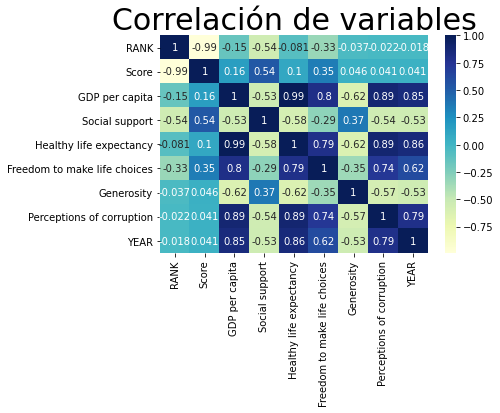

In [ ]:
plt.title("Correlación de variables", fontsize = 30)
sns.heatmap(tb.corr(), cmap="YlGnBu", annot = True)

## *CREACIÓN DE LAS SUBTABLAS*

In [ ]:
#Queremos separar la tabla por años, por eso creamos estas "subtablas"
tabla_2018=tb[tb['YEAR']==2018]
tabla_2019=tb[tb['YEAR']==2019]
tabla_2020=tb[tb['YEAR']==2020]

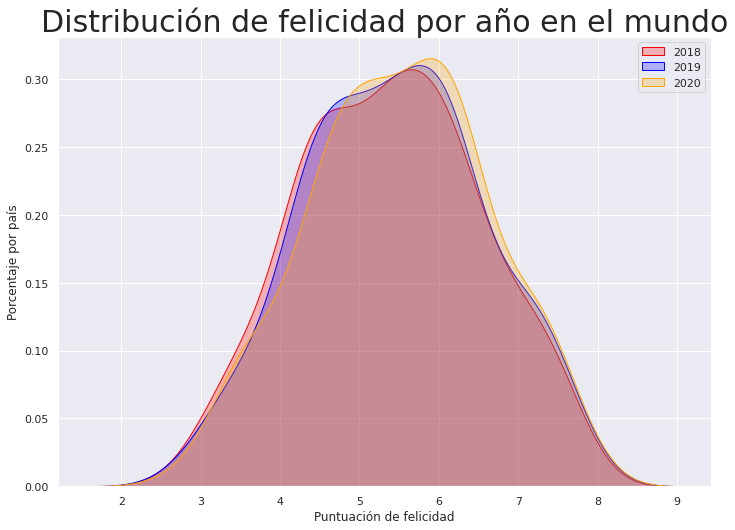

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.title("Distribución de felicidad por año en el mundo", fontsize = 30)
plt.ylabel("Porcentaje por país")
plt.xlabel("Puntuación de felicidad")

sns.kdeplot(data = tabla_2018['Score'], shade = True, color = 'red', label = '2018')
sns.kdeplot(data = tabla_2019['Score'], shade = True, color = 'blue', label = '2019')
sns.kdeplot(data = tabla_2020['Score'], shade = True, color = 'orange', label = '2020')
plt.legend()

*Trasponiendo los 3 años podemos percibir que durante el 2018 y 2019 no es tan variable, sin embargo el 2020 si, uno de los factores principales considerados desde las perspectivas de cada país puede ser la pandemia mundial que seguimos atravesando hoy en día.*

In [ ]:
df2018 = tabla_2018.iloc[:20,:]
df2019 = tabla_2019.iloc[:20,:]
df2020 = tabla_2020.iloc[:20,:]
import plotly.graph_objs as go
g1 = go.Scatter(
                    x = df2018['PAIS'],
                    y = df2018['Score'],
                    mode = "markers",
                    name = "2018",
                    marker = dict(color = 'red'),
                    text= df2018.PAIS)
g2 = go.Scatter(
                    x = df2018['PAIS'],
                    y = df2019['Score'],
                    mode = "markers",
                    name = "2019",
                    marker = dict(color = 'green'),
                    text= df2019.PAIS)

g3 =go.Scatter(
                    x = df2018['PAIS'],
                    y = df2020['Score'],
                    mode = "markers",
                    name = "2020",
                    marker = dict(color = 'blue'),
                    text= df2020.PAIS)

data = [g1,g2,g3]
fig = go.Figure(data)
fig.show()

*Se muestran a los 20 países más felices en los 3 años de análisis, en ésta gráfica no aparece nuestro país, pero si el país vecino, el cual podemos ver que su puntaje varía ligeramente, al igual que los puestos 3, 4 y 5, en los otros países el puntaje tiene mayor variación.*

## *CÁLCULO ESTADÍSTICO DEL AÑO 2018*

In [ ]:
#Hicimos una lista para facilitar los calculos estadisticos 
lista=['PAIS','YEAR','REGION','Score','GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
for i in range(len(lista)):
 tabla_2018[lista[i]].describe()
 tabla_2018.corr()
 print(tabla_2018[lista[i]].describe())

count      139
unique     139
top       Peru
freq         1
Name: PAIS, dtype: object
count     139.0
mean     2018.0
std         0.0
min      2018.0
25%      2018.0
50%      2018.0
75%      2018.0
max      2018.0
Name: YEAR, dtype: float64
count                    139
unique                     5
top       Sub-Saharan Africa
freq                      96
Name: REGION, dtype: object
count    139.000000
mean       5.392014
std        1.121385
min        2.910000
25%        4.465000
50%        5.400000
75%        6.155000
max        7.630000
Name: Score, dtype: float64
count    139.000000
mean       0.886259
std        0.390127
min        0.020000
25%        0.575000
50%        0.960000
75%        1.185000
max        2.100000
Name: GDP per capita, dtype: float64
count    139.000000
mean       1.223957
std        0.296967
min        0.000000
25%        1.075000
50%        1.270000
75%        1.470000
max        1.640000
Name: Social support, dtype: float64
count    139.000000
mean       0.

In [ ]:
an2018 = tabla_2018.iloc[:30,:]

eco2018 = go.Scatter(x = an2018['PAIS'],
                    y = an2018['GDP per capita'],
                    mode = "lines+markers",
                    name = "Economía",
                    marker = dict(color = 'red'),
                    text= an2018.PAIS)

lib2018 = go.Scatter(x = an2018['PAIS'],
                    y = an2018['Freedom to make life choices'],
                    mode = "lines+markers",
                    name = "Libertad",
                    marker = dict(color = 'blue'),
                    text= an2018.PAIS)

corr2018 = go.Scatter(x = an2018['PAIS'],
                    y = an2018['Perceptions of corruption'],
                    mode = "lines+markers",
                    name = "Corrupción",
                    marker = dict(color = 'green'),
                    text= an2018.PAIS)

data = [eco2018,lib2018,corr2018]
fig = go.Figure(data)
fig.show()

*La economía es considerada el factor con mayor peso, en nuestra base esto hace referencia al Per Capita.*

## *CÁLCULO ESTADÍSTICO DEL AÑO 2019*

In [ ]:
for i in range(len(lista)):
 tabla_2019[lista[i]].describe()
 tabla_2019.corr()
 print(tabla_2019[lista[i]].describe())

count      138
unique     138
top       Peru
freq         1
Name: PAIS, dtype: object
count     138.0
mean     2019.0
std         0.0
min      2019.0
25%      2019.0
50%      2019.0
75%      2019.0
max      2019.0
Name: YEAR, dtype: float64
count                    138
unique                     5
top       Sub-Saharan Africa
freq                      95
Name: REGION, dtype: object
count    138.000000
mean       5.443768
std        1.115615
min        2.850000
25%        4.560000
50%        5.430000
75%        6.195000
max        7.770000
Name: Score, dtype: float64
count    138.000000
mean       0.904565
std        0.391371
min        0.030000
25%        0.587500
50%        0.960000
75%        1.220000
max        1.610000
Name: GDP per capita, dtype: float64
count    138.000000
mean       1.223333
std        0.291471
min        0.000000
25%        1.077500
50%        1.280000
75%        1.460000
max        1.620000
Name: Social support, dtype: float64
count    138.000000
mean       0.

In [ ]:
an2019 = tabla_2019.iloc[:30,:]

eco2019 = go.Scatter(x = an2019['PAIS'],
                    y = an2019['GDP per capita'],
                    mode = "lines+markers",
                    name = "Economía",
                    marker = dict(color = 'red'),
                    text= an2019.PAIS)

lib2019 = go.Scatter(x = an2019['PAIS'],
                    y = an2019['Freedom to make life choices'],
                    mode = "lines+markers",
                    name = "Libertad",
                    marker = dict(color = 'blue'),
                    text= an2019.PAIS)

corr2019 = go.Scatter(x = an2019['PAIS'],
                    y = an2019['Perceptions of corruption'],
                    mode = "lines+markers",
                    name = "Corrupción",
                    marker = dict(color = 'green'),
                    text= an2019.PAIS)

data = [eco2019,lib2019,corr2019]
fig = go.Figure(data)
fig.show()

*La gráfica que menos cambios presenta es la de libertad, al contrario de la economía, el cual lleva más peso, en ésta si aparecen nuestros dos países de referencia, podemos ver que México tiene un pico invertido, al contrario de los lugares de su orilla, pero se mantiene sobre otros países, esto es gracias a que se consideran los otros factores que se dan en la base*

## *CÁLCULOS ESTADÍSTICOS DEL AÑO 2020*

In [ ]:
for i in range(len(lista)):
 tabla_2020[lista[i]].describe()
 tabla_2020.corr()
 print(tabla_2020[lista[i]].describe())

count      139
unique     139
top       Peru
freq         1
Name: PAIS, dtype: object
count     139.0
mean     2020.0
std         0.0
min      2020.0
25%      2020.0
50%      2020.0
75%      2020.0
max      2020.0
Name: YEAR, dtype: float64
count                    139
unique                    10
top       Sub-Saharan Africa
freq                      36
Name: REGION, dtype: object
count    139.00000
mean       5.50295
std        1.11022
min        2.82000
25%        4.72500
50%        5.54000
75%        6.27000
max        7.81000
Name: Score, dtype: float64
count    139.000000
mean       9.280791
std        1.205191
min        6.490000
25%        8.320000
50%        9.460000
75%       10.265000
max       11.450000
Name: GDP per capita, dtype: float64
count    139.000000
mean       0.811367
std        0.120718
min        0.320000
25%        0.740000
50%        0.830000
75%        0.910000
max        0.980000
Name: Social support, dtype: float64
count    139.000000
mean      64.360576
s

In [ ]:
an2020 = tabla_2020.iloc[:30,:]

eco2020 = go.Scatter(x = an2020['PAIS'],
                    y = an2020['GDP per capita'],
                    mode = "lines+markers",
                    name = "Economía",
                    marker = dict(color = 'red'),
                    text= an2020.PAIS)

lib2020 = go.Scatter(x = an2020['PAIS'],
                    y = an2020['Freedom to make life choices'],
                    mode = "lines+markers",
                    name = "Libertad",
                    marker = dict(color = 'blue'),
                    text= an2020.PAIS)

corr2020 = go.Scatter(x = an2020['PAIS'],
                    y = an2020['Perceptions of corruption'],
                    mode = "lines+markers",
                    name = "Corrupción",
                    marker = dict(color = 'green'),
                    text= an2020.PAIS)

data = [eco2020,lib2020,corr2020]
fig = go.Figure(data)
fig.show()

*Nuestros países de interés en este año, es común con los lugares vecinos en el rank, por lo cual podemos ver que son muy variantes lo cual les ayuda a mantener su puntaje de felicidad en el rango.*

# *GRAFICOS ANUALES*

Las siguientes gráficas fueron realizadas gracias a que tomamos códigos de referencia, de personas que ya habían trabajado con la base de datos.

- https://www.kaggle.com/battaluar/why-some-countries-happier-than-others
- https://www.kaggle.com/mishki/exploratory-data-analysis-pandas-numpy-seaborn

Orden descendente; 2018, 2019, 2020


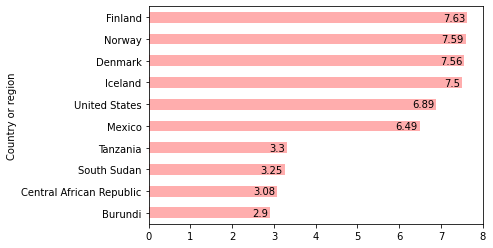

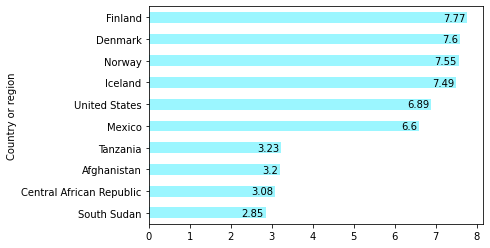

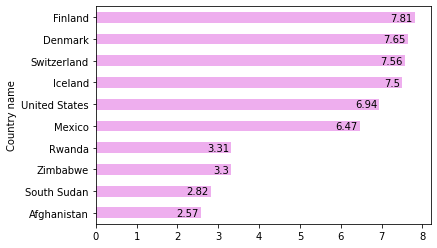

In [ ]:
print("Orden descendente; 2018, 2019, 2020")
happiest_countries_2018 = tb18[['Country or region', 'Score']]
happiest_countries_2018 = happiest_countries_2018.iloc[::-1] 
happiest_countries_2018 = happiest_countries_2018.set_index(happiest_countries_2018['Country or region']).drop('Country or region', axis='columns')
# print(happiest_countries_2018)
happiest_countries_2018 = happiest_countries_2018.plot(kind='barh', legend=False, color='#FFADAD');
for p in happiest_countries_2018.patches:
    happiest_countries_2018.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');

happiest_countries_2019 = tb19[['Country or region', 'Score']]
happiest_countries_2019 = happiest_countries_2019.iloc[::-1]
happiest_countries_2019 = happiest_countries_2019.set_index(happiest_countries_2019['Country or region']).drop('Country or region', axis='columns')
# print(happiest_countries_2019)
happiest_countries_2019 = happiest_countries_2019.plot(kind='barh', legend=False, color='#9BF6FF');
for p in happiest_countries_2019.patches:
    happiest_countries_2019.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');

happiest_countries_2020 = tb20[['Country name', 'Ladder score']]
happiest_countries_2020 = happiest_countries_2020.iloc[::-1] 
happiest_countries_2020 = happiest_countries_2020.set_index(happiest_countries_2020['Country name']).drop('Country name', axis='columns')
# print(happiest_countries_2020)
happiest_countries_2020 = happiest_countries_2020.plot(kind='barh', legend=False, color='#EEAEEE');
for p in happiest_countries_2020.patches:
    happiest_countries_2020.annotate(str(round(p.get_width(),2)), (p.get_x() + p.get_width(), p.get_y()),
                                     xytext=(-2, 2), textcoords='offset points', horizontalalignment='right');

fig.tight_layout()

*El puesto número uno se mantiene durante los tres años, encabezado por Finlandia, pero no podemos decir lo mismo de los úlimos lugares, nuestros dos principales intereses se mantienen en el rango de puntaje similar durante el paso del tiempo, de esta manera, nos podemos dar cuenta que nuestro país no es tan relativamente lejano en puntaje de felicidad, al país vecino considerado potencia mundial*

Factores considerados para la medida del 2020


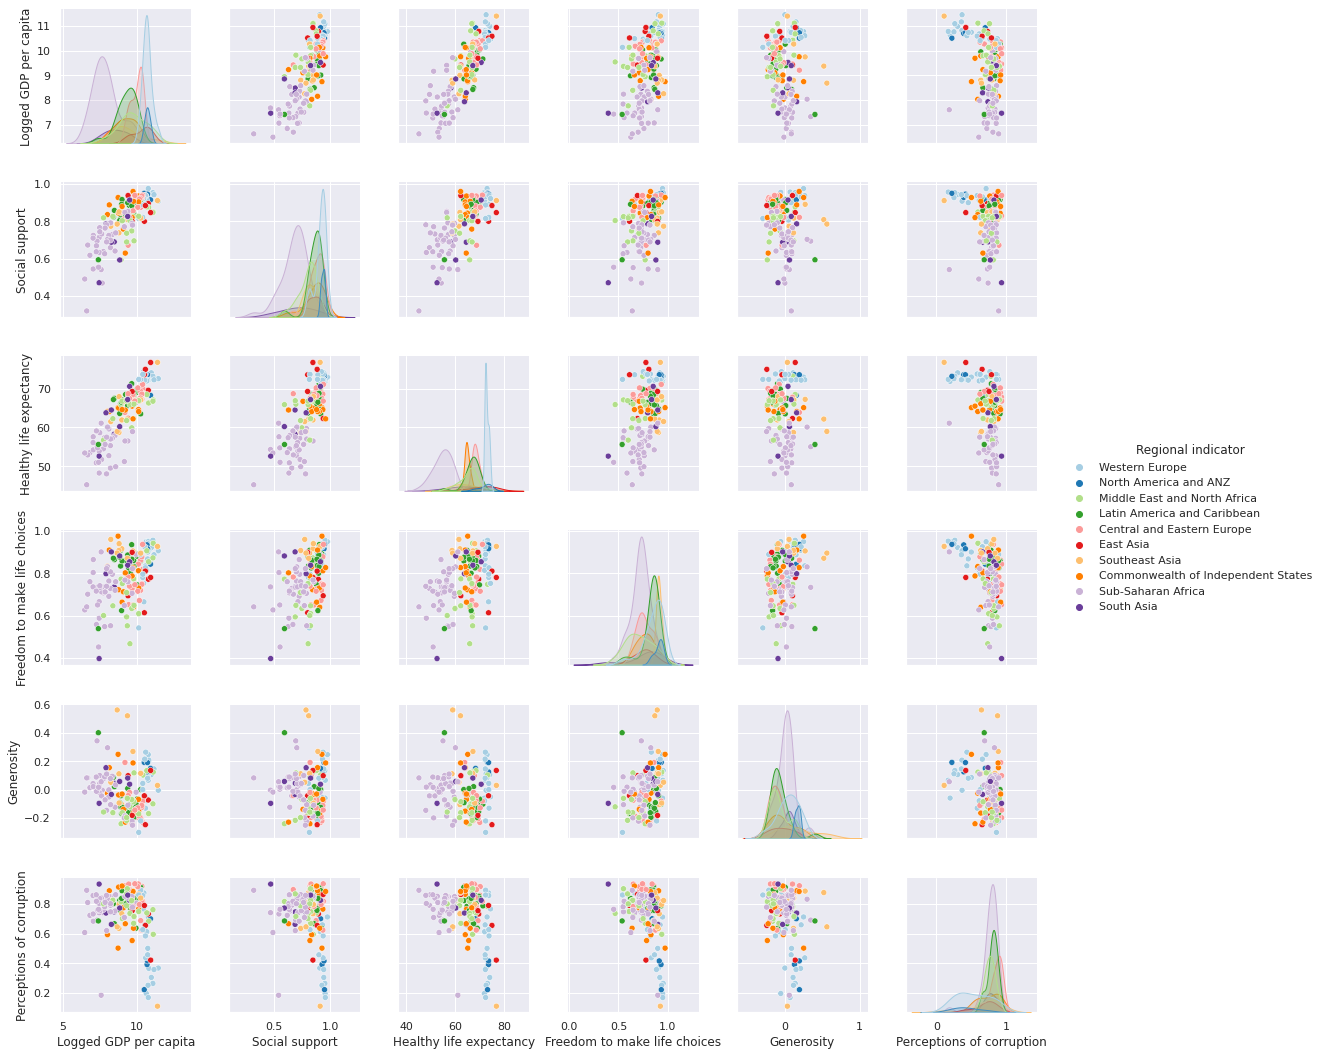

In [ ]:
print("Factores considerados para la medida del 2020")
columns = ['Regional indicator','Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',\
           'Perceptions of corruption']
sns.pairplot(tb20[columns], hue="Regional indicator", palette="Paired")

meaningful_columns = ['Ladder score','Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia']


# *Conclusión global*

De acuerdo a las graficas y al analisis realizado anteriormente, podemos darnos cuenta que el principal "peso" para el puntaje de la felicidad esta basado en el Per Capita, ya que este es un indicador muy utilizado y proporcionado en cada pais, que nos indica el nivel socioeconómico de cada uno.

Con nuestros dos principales intereses de paises, podemos percibir que México es un país que tienen una base suficientemente fuerte entorno a la felicidad siendo comparada con una potencia cercana.